# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')


### Step 4. See the first 10 entries

In [3]:
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

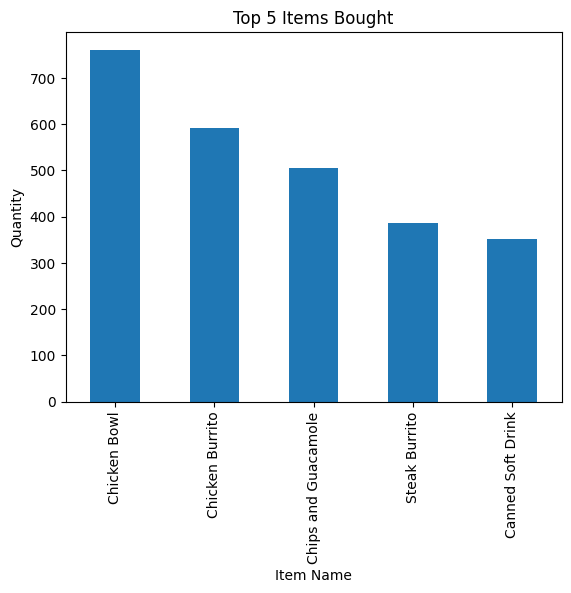

In [4]:
# Tổng số lượng theo item
item_counts = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)

# Vẽ biểu đồ
item_counts.plot(kind='bar', title='Top 5 Items Bought')
plt.ylabel('Quantity')
plt.xlabel('Item Name')
plt.show()


### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

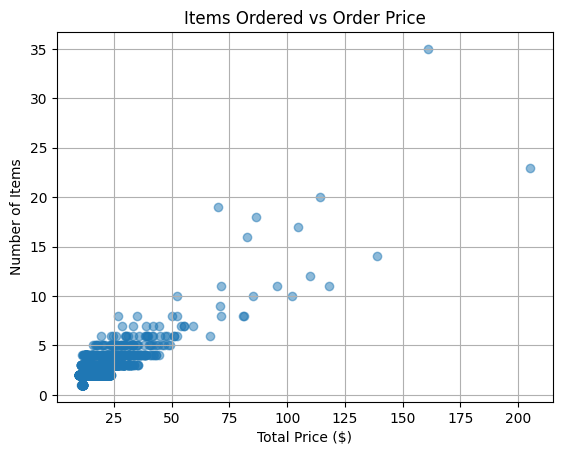

In [5]:
# Chuyển đổi 'item_price' sang số thực
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Tính tổng giá theo mỗi order_id
order_price = chipo.groupby('order_id').agg({
    'item_price': 'sum',
    'quantity': 'sum'
}).reset_index()

# Vẽ scatter plot
plt.scatter(order_price['item_price'], order_price['quantity'], alpha=0.5)
plt.title('Items Ordered vs Order Price')
plt.xlabel('Total Price ($)')
plt.ylabel('Number of Items')
plt.grid(True)
plt.show()


### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-6-36d85175b008>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  revenue_per_item = chipo.groupby('item_name').apply(


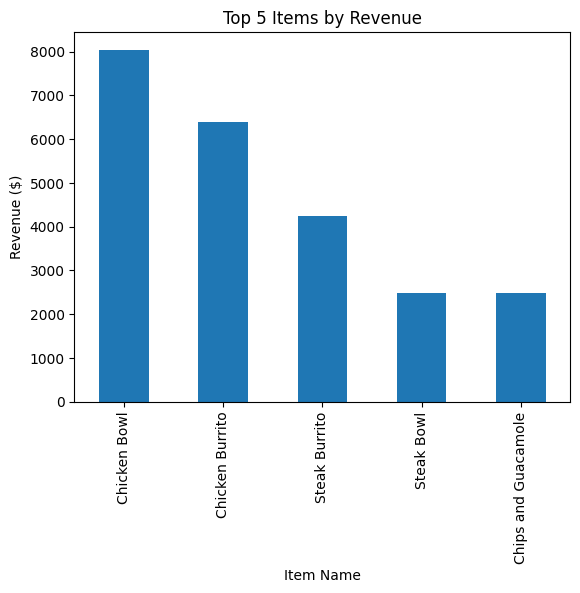

In [6]:
# Tính tổng doanh thu theo món
revenue_per_item = chipo.groupby('item_name').apply(
    lambda x: (x['item_price'] * x['quantity']).sum()
).sort_values(ascending=False).head(5)

# Vẽ biểu đồ
revenue_per_item.plot(kind='bar', title='Top 5 Items by Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Item Name')
plt.show()
